<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Iris-dataset" data-toc-modified-id="Iris-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Iris dataset</a></span></li><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reading data</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Table-of-results" data-toc-modified-id="Table-of-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Table of results</a></span></li><li><span><a href="#Keras-Logistic-Regression" data-toc-modified-id="Keras-Logistic-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Keras Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li><li><span><a href="#Keras-MLP-(TASK):-via-functional-API" data-toc-modified-id="Keras-MLP-(TASK):-via-functional-API-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Keras MLP (TASK): via functional API</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Insight-into-network-weights" data-toc-modified-id="Insight-into-network-weights-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Insight into network weights</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Comparison</a></span></li></ul></div>

# Iris dataset

In this notebook we're going to investigate highly renowned "Fisher's Iris" dataset for classifcation. It contains 3 classes of iris flowers along with 4 features for each flower. The task is to classify each object judging by this 4 features.

# Preparation

In [ ]:
"""
pip install pydot
sudo apt-add-repository ppa:dperry/ppa-graphviz-test
sudo apt-get update
sudo apt-get autoremove graphviz
sudo apt-get install graphviz

"""

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize

from keras.layers import Dense, Input
from keras.models import Model
from keras.utils.vis_utils import model_to_dot

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.display import SVG, display

Using TensorFlow backend.


Set style for plotting

In [2]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

Fix random seed for reproducibility

In [3]:
np.random.seed(42)

# Reading data

Iris dataset is extremely common in machine learning experiments thus it is embedded in sklearn.

In [4]:
iris = load_iris()

Detailed description of dataset and features

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Create pandas dataframe with objects in rows and features in columns

In [6]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Below there are the names of the classes for the further use

In [9]:
class_labels = ["setosa", "versicolour", "virginica"]

All the features here are continiuos numerical features

Let's also take a look into correlation matrix of features

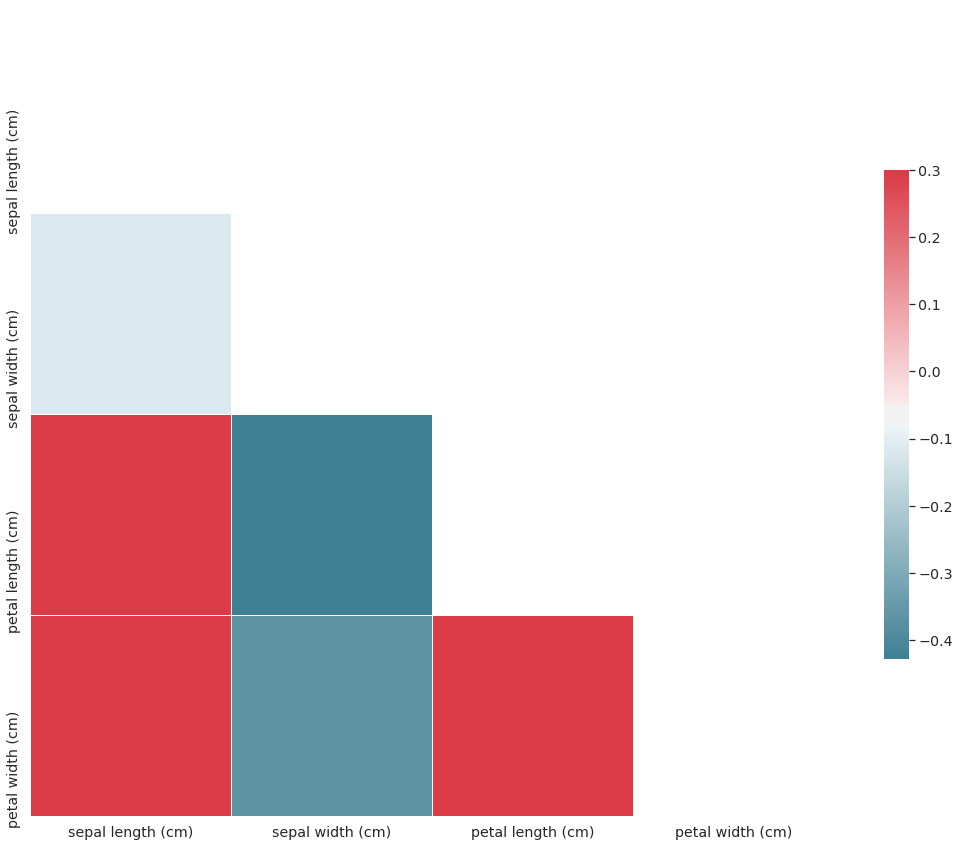

In [10]:
# compute the correlation matrix
corr = X.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

Sometimes it's worth to take a look into paiwise features distributions. In some cases it becomes obvious how to separate classes and build a classifier

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


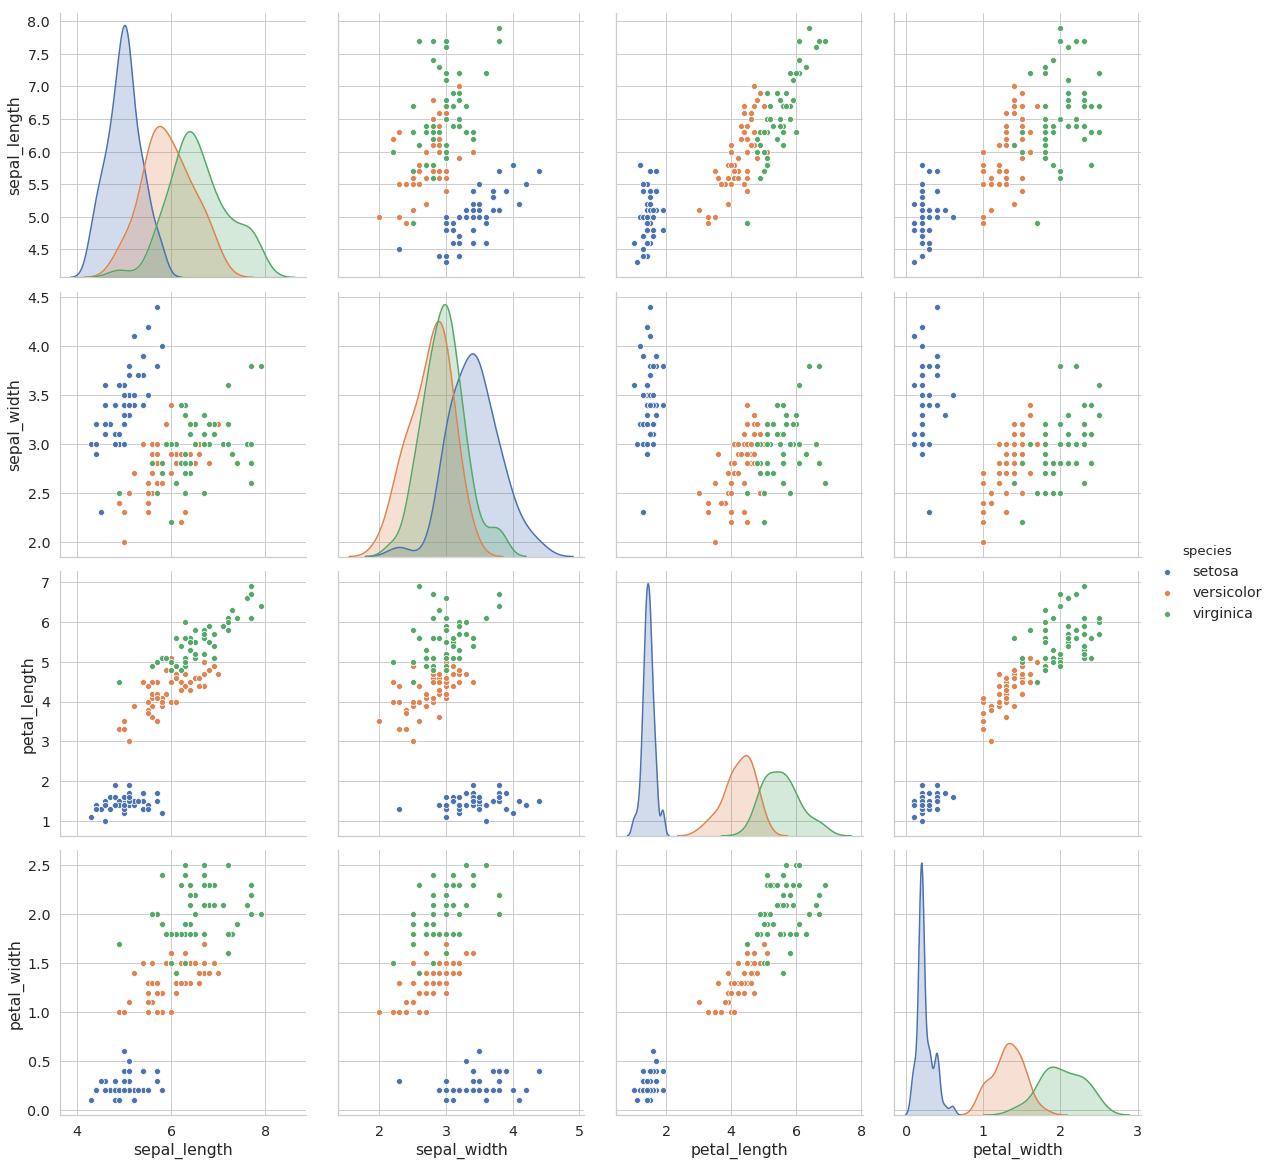

In [11]:
sns.pairplot(sns.load_dataset("iris"), hue="species", size=4);

As one can observe from this graph, one class (setosa) separates almost with no error. Other two are also almost linearly separable.

Therefore we anticipate very high classification quality.

# Data preprocessing

Here the scale of the features is almost the same for all the features thus there is no need to do rescaling. So we only need to do train/test splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Table of results

It is important to track results of different experiments for the sake of further comparison.

In [13]:
results = pd.DataFrame(columns=["Accuracy"])

# Keras Logistic Regression

Multinomial Logistic Regression model can be seen as a neural network with no hidden layer and with *softmax* activation function.

Iris dataset has 4 features per sample. Thus we have 4 units in the input layer. Our problem has 3 classes and therefore we should have 3 output units.

In [14]:
inp = Input(shape=(4,))
out = Dense(3, activation="softmax")(inp)

Multinomial Logistic Regression uses softmax activation in multiclass case instead of binary logit function. Also we use crossentropy as a loss function.

In [15]:
model = Model(inputs=[inp], outputs=[out])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Split into train and test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X.values, label_binarize(y, classes=[0, 1, 2]), 
                                                    test_size=0.2, random_state=42)

## Fitting

In [17]:
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test), 
                 epochs=300, verbose=0)

Accuracy evolution during training

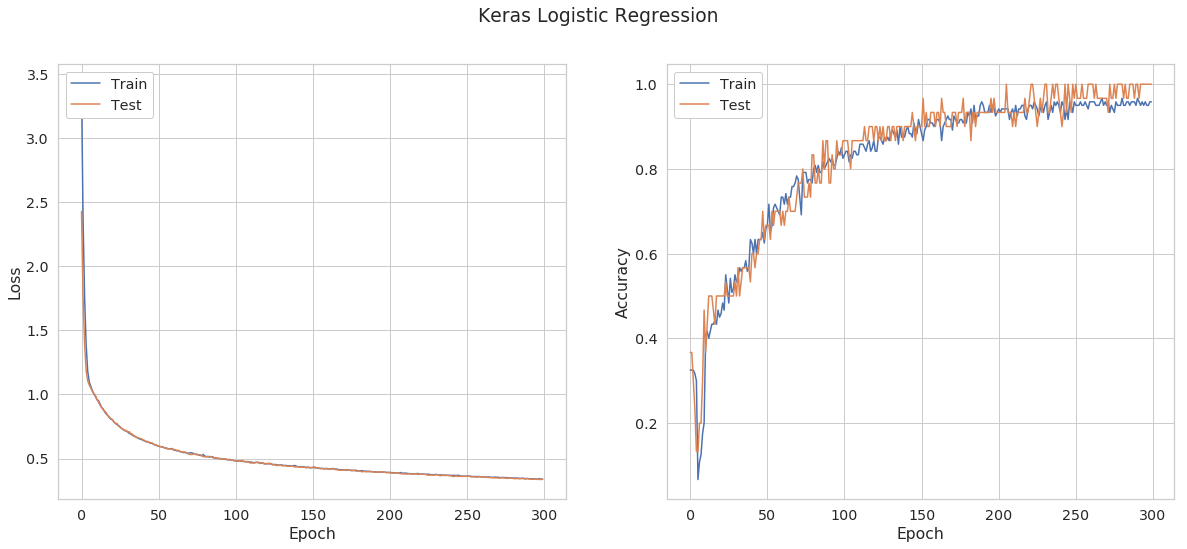

In [18]:
plt.figure(figsize=(20, 8))
plt.suptitle("Keras Logistic Regression")
plt.subplot(121)
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label="Test")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(122)
plt.plot(hist.history["accuracy"], label="Train")
plt.plot(hist.history["val_accuracy"], label="Test")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy");

## Evaluation

Predicting both train and test sets to evaluate model

In [19]:
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)

Cast back from OHE to labels

In [20]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

preds_train = np.argmax(preds_train, axis=1)
preds_test = np.argmax(preds_test, axis=1)

Accuracy scores

In [21]:
print("Train accuracy:", np.round(accuracy_score(y_train, preds_train), 3))
print("Test accuracy:", np.round(accuracy_score(y_test, preds_test), 3))

Train accuracy: 0.967
Test accuracy: 1.0


In [22]:
results = results.append(pd.DataFrame(
        [np.round(accuracy_score(y_train, preds_train), 3), np.round(accuracy_score(y_test, preds_test), 3)], 
        columns=["Accuracy"], 
        index=["Keras LR Train", "Keras LR Test"]))

In [23]:
results

,Accuracy
Keras LR Train,0.967
Keras LR Test,1.000


Confusion matrices

In [24]:
cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

Visualize them

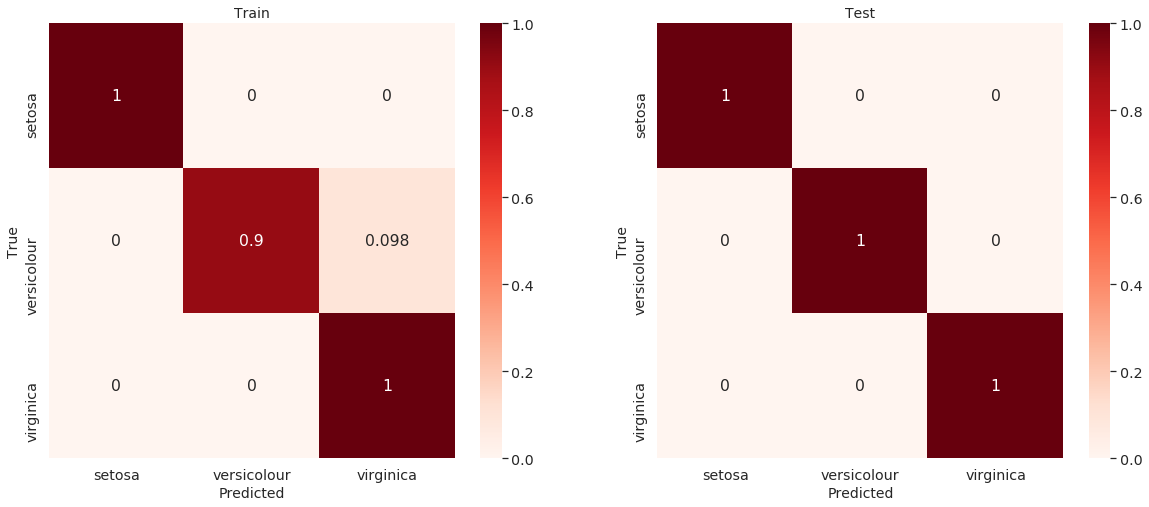

In [25]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Test", fontsize=14);

# Keras MLP (TASK): via functional API

Iris dataset has 4 features per sample. Thus we have 4 units in the input layer. Our problem has 3 classes and therefore we should have 3 output units.

Now let's add one more hidden layer with $20$ unit between input and output and $\text{tanh}$ activation function.

The syntax is the following (Keras API):

$\text{<name> = <Layer>(<args>)(<name of layer to connect to>)}$

In [26]:
inp = Input(shape=(4,))
# add Dense layer called "hidden" with 20 neurons and "relu" activation and connect it to the "inp" layer
hidden = Dense(20, activation="relu")(inp)
out = Dense(3, activation="softmax")(hidden)

MLP

In [27]:
model = Model(inputs=[inp], outputs=[out])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model description

In [28]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


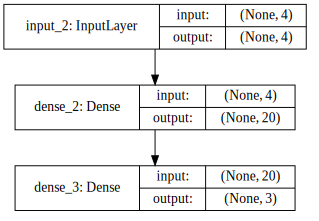

In [34]:
arch_pic = SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))
display(arch_pic)

Split into train and test set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X.values, label_binarize(y, classes=[0, 1, 2]), 
                                                    test_size=0.2, random_state=42)

## Fitting

In [36]:
%%time
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test), 
                 epochs=500, verbose=0)

CPU times: user 12.5 s, sys: 1.32 s, total: 13.8 s
Wall time: 7.55 s


Accuracy evolution during training

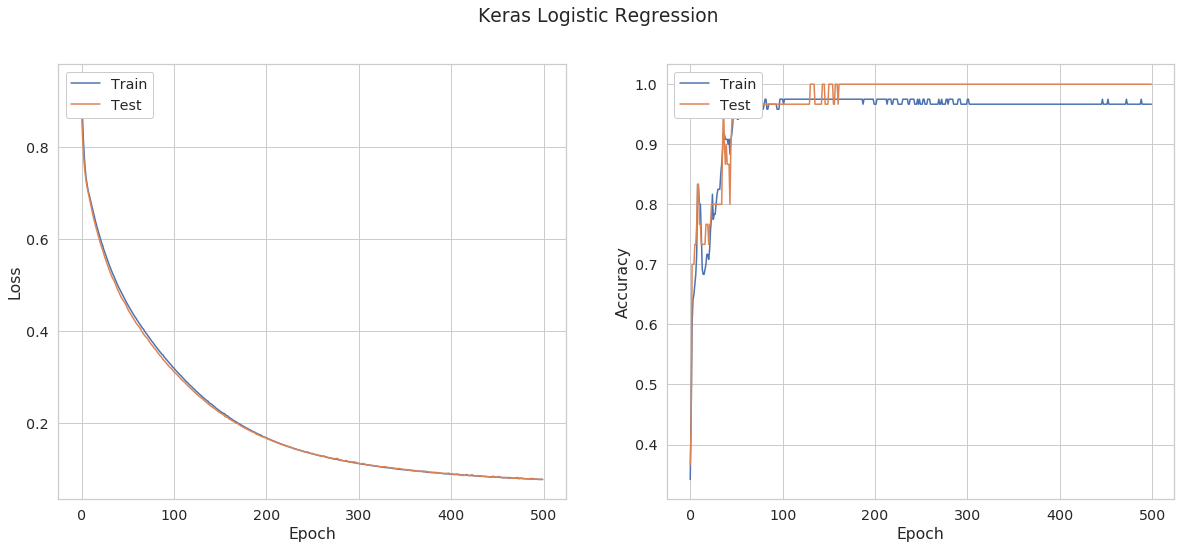

In [38]:
plt.figure(figsize=(20, 8))
plt.suptitle("Keras Logistic Regression")
plt.subplot(121)
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label="Test")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(122)
plt.plot(hist.history["accuracy"], label="Train")
plt.plot(hist.history["val_accuracy"], label="Test")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy");

## Insight into network weights

Let's look how weights look like

In [39]:
weigths = model.get_weights()

We have the following number of parameter matrices

In [40]:
len(weigths)

4

They are:
* $\text{weigths[0]} = \text{W}^{1}$ is a weight matrix between input and hidden layer; should have $(4;20)$ shape because we have dimension of input 4 and hidden dimension 20
* $\text{weigths[1]} = \mathbf{b}^{1}$ is a bias vector for hidden layer; should have $(20,)$ shape because we have 20 as a  dimension of a hidden layer
* $\text{weigths[2]} = \text{W}^{2}$ is a weight matrix between hidden and output layer; should have $(20; 3)$ shape because we have hidden dimension 20 and dimension of output 3
* $\text{weigths[3]} = \mathbf{b}^{2}$ is a bias vector for output layer; should have $(3,)$ shape because we have 3 as an output dimension

In [41]:
print(weigths[0].shape)
print(weigths[1].shape)
print(weigths[2].shape)
print(weigths[3].shape)

(4, 20)
(20,)
(20, 3)
(3,)


Example of weight matrix and bias vector

In [42]:
print("W^1:")
print(weigths[0])
print("\nb^1:")
print(weigths[1])

W^1:
[[-0.3315072   0.5591434   0.1119839  -0.31466293  0.14345208  0.24296086
  -0.26802886 -0.31907737 -0.16886687  0.64103836 -0.1311084  -0.22562766
  -0.39465082  0.29668614 -0.38079044  0.46242508  0.05932928 -0.12227705
  -0.08086092 -0.4338343 ]
 [-0.16312099  0.3918714  -0.1032449   0.20457315 -0.15974842 -0.7502003
  -0.3648317  -0.11682165 -0.23350203  0.53724575  0.20001769  0.22068405
   0.2345674  -0.73435986 -0.25578466  0.6955623   0.66837305 -0.12097035
  -0.10468918 -0.28781104]
 [ 0.10028577 -0.36610195 -0.27574492 -0.17580795 -0.22800949  0.9158446
   0.4498365  -0.4012617   0.3061167  -0.61568946 -0.493783   -0.1148777
  -0.32339597  0.7642347   0.5760759  -0.51704174  0.10559808  0.7324206
   0.45647064 -0.17384148]
 [-0.11678874 -0.38655454 -0.06446838  0.37421143  0.1319481   1.198931
  -0.39984286 -0.33082616 -0.3919984  -0.6305017  -0.18035805  0.20892334
  -0.14652514  0.94848925  0.8971498  -0.95471853 -0.19490172  1.0679158
   0.9210705  -0.48018408]]

b^1:

## Evaluation

Predicting both train and test sets to evaluate model

In [43]:
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)

Cast back from OHE to labels

In [44]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

preds_train = np.argmax(preds_train, axis=1)
preds_test = np.argmax(preds_test, axis=1)

Accuracy scores

In [45]:
print("Train accuracy:", np.round(accuracy_score(y_train, preds_train), 3))
print("Test accuracy:", np.round(accuracy_score(y_test, preds_test), 3))

Train accuracy: 0.967
Test accuracy: 1.0


In [46]:
results = results.append(pd.DataFrame(
        [np.round(accuracy_score(y_train, preds_train), 3), np.round(accuracy_score(y_test, preds_test), 3)], 
        columns=["Accuracy"], 
        index=["Keras MLP Train", "Keras MLP Test"]))

In [47]:
results

,Accuracy
Keras LR Train,0.967
Keras LR Test,1.000
Keras MLP Train,0.967
Keras MLP Test,1.000


Confusion matrices

In [48]:
cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

Visualize them

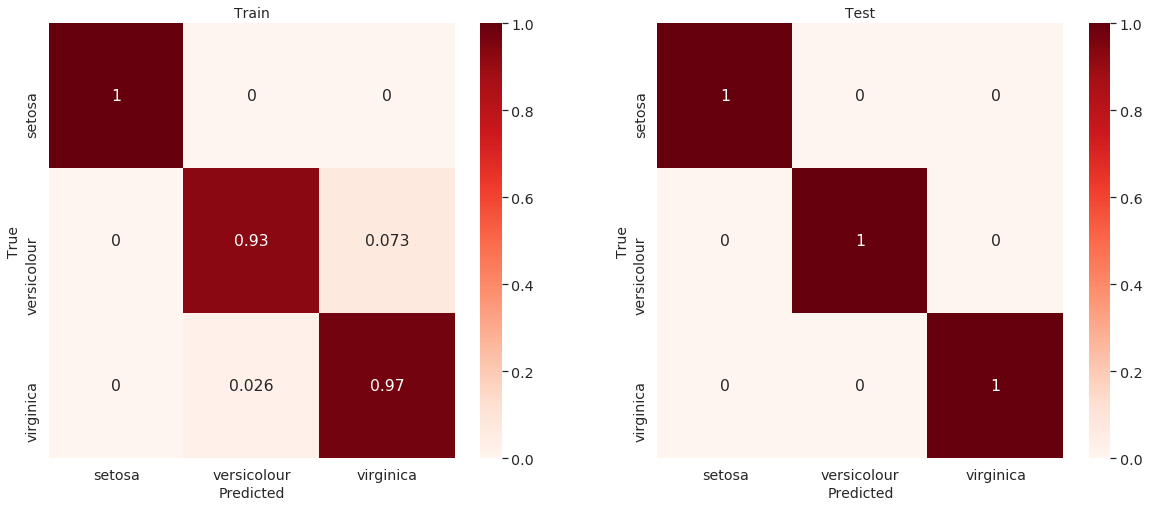

In [49]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Test", fontsize=14);

# Comparison

In [50]:
results

,Accuracy
Keras LR Train,0.967
Keras LR Test,1.000
Keras MLP Train,0.967
Keras MLP Test,1.000
